# Text Mining on Text Datsets

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

Text mining, also known as text data mining or text analytics, is the process of extracting useful information and insights from unstructured text data. Text mining involves a combination of techniques from `natural language processing`, `machine learning`, and data mining to extract `patterns`, `trends`, and other valuable insights from large volumes of `text data`. 

It is used in a variety of fields, including business, healthcare, social media, and academia, to uncover trends, sentiment, and other important information that can help organizations make more informed decisions. Text mining techniques include `text classification`, `sentiment analysis`, `named entity recognition`, and `topic modeling`, among others.

![image](https://noduslabs.com/wp-content/uploads/2011/12/figure-5-meaning-circulation-510x487.png)

We will use the data we scraped in [this notebook](https://github.com/Nkluge-correa/teeny-tiny_castle/blob/fa17764aa8800c388d0d298b750c686757e0861e/ML%20Explainability/NLP%20Interpreter/text_scraping.ipynb) to feed this tutorial.

In [1]:
import pandas as pd

df = pd.read_csv('data/google_play_apps_review_pt.csv')

df['sentiment_class'] = df['sentiment'].replace(
               {0:'Negative Sentiment', 1:'Positive Sentiment'})
               
display(df)

,review,sentiment,sentiment_class
0,o aplicativo e bom disparadamente melhor que o...,1,Positive Sentiment
1,aos que estao criticando o aplicativo por cont...,1,Positive Sentiment
2,ze a proposta e muito boa o app e bem funciona...,1,Positive Sentiment
3,ja tenho encomendado varias vezes refeicoes e ...,1,Positive Sentiment
4,gosto muito do app e ja usei varias vezes para...,1,Positive Sentiment
...,...,...,...
19995,e o app que eu passo mais tempo usando mas do ...,0,Negative Sentiment
19996,e impossivel fica este aplicativo nao ta dando...,0,Negative Sentiment
19997,eu tava gostando do appmais hoje venho reclama...,0,Negative Sentiment
19998,o tiktok e um aplicativo muito fixe no entanto...,0,Negative Sentiment


### Text mining with `Scattertext`

`Scattertext` is  "_a Python package that lets you interactively visualize how two categories of text are different from each other_." We can use this library to gain insight into our text corpus.

Let's us use only the top `1000` lengthiest reviews (for both classes = [`Negative`, `Positive`]) to create our `Scattertext_plot`.

In [2]:
df_1 = df[df['sentiment_class'] == 'Negative Sentiment']
df_1 = df_1.sort_values(by='review', key=lambda x: x.str.len(), ascending = False)
df_2 = df[df['sentiment_class'] == 'Positive Sentiment']
df_2 = df_2.sort_values(by='review', key=lambda x: x.str.len(), ascending = False)

df_p = df_1.head(1000)
df_n = df_2.head(1000)

df_google_play = pd.concat([df_p, df_n])
display(df_google_play)

,review,sentiment,sentiment_class
10000,se por qquer motivo o app e desinstalado e rei...,0,Negative Sentiment
10001,dei uma estrela na avaliacao porque nao tinha ...,0,Negative Sentiment
10002,a experiencia no tiktok ficou bem ruim princip...,0,Negative Sentiment
10003,o aplicativo em si funciona apesar de ter prob...,0,Negative Sentiment
10004,para os novatos cuidado na minha primeira comp...,0,Negative Sentiment
...,...,...,...
980,gosto da aplicacao e super pratica facil e com...,1,Positive Sentiment
981,o app em si e bom atendimento da uber e pessim...,1,Positive Sentiment
982,aplicativo muito pratico toda semana tem promo...,1,Positive Sentiment
983,tive algumas experiencias bem frustrantes logo...,1,Positive Sentiment


We will also use a custom list of stopwords to exclude words that should not influence (too much) the classification of our sentiment classifier (e.g., the, and, etc.)

We also need to download the `en_core_web_sm` if we are working with English text, or the `pt_core_news_sm` if you are working with Portuguese text.

In [4]:
import os
import spacy
import scattertext

#os.system("python -m spacy download en_core_web_sm")
os.system("python -m spacy download pt_core_news_sm")

0

Now, we can create an interactive HTML-dashboard to explore our text corpus!

In [5]:
nlp = spacy.load('pt_core_news_sm')

with open('data/stopwords_pt.txt', 'r') as fp:
    str_f = fp.read()
    set_stopwords = set(str_f.split('\n'))
    fp.close()

nlp.Defaults.stop_words |= set_stopwords

corpus = (scattertext.CorpusFromPandas(df_google_play,
                                        category_col='sentiment_class', 
                                        text_col='review',
                                        nlp=nlp)
            .build()
            .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
            )

corpus_dataframe = df_google_play
html = scattertext.produce_scattertext_explorer(
                   corpus,
                   category='Positive Sentiment',
                   category_name='Positive Sentiment',
                   not_category_name='Negative Sentiment',
                   width_in_pixels=700)

open("data/Scattertext_plot.html", 'wb').write(html.encode('utf-8'))
from IPython.display import display, HTML
display(HTML("<a href='data/Scattertext_plot.html' target='_blank'>data/Scattertext_plot.html</a>"))

### Univariate visualization

To explore and examine specific variables or features within a text dataset, we can use a technique known as univariate visualization. In univariate visualization, a single variable is plotted or displayed to comprehend its frequency, distribution, and other properties. 

Univariate visualization methods for text data include `word clouds`, `frequency histograms`, and `bar charts`, which reveal the frequency of particular words or phrases in a dataset. Univariate visualization in text mining can be used to find significant terms, patterns, and topics within a dataset. It is frequently applied as an initial step in text analysis to help understand the data.

For `word clouds`, we can use something like the `wordcloud` and `matplotlib` packages.

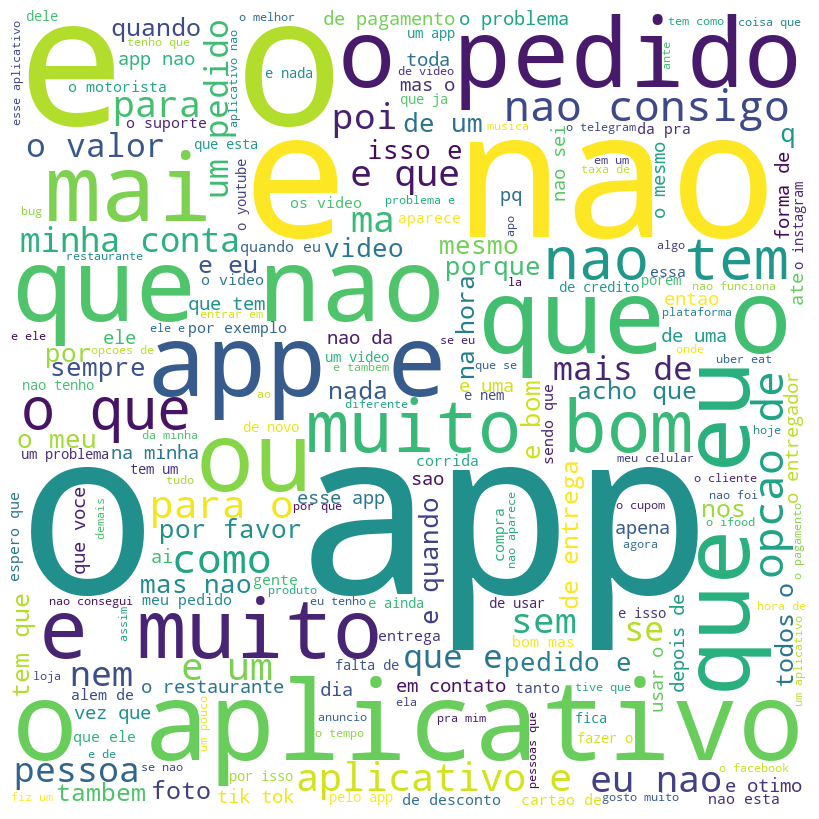

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv(r'data/google_play_apps_review_pt.csv')

text = ' '.join(list(df.review))

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

For `frequency histograms`, we can use are good old firend `plotly`

In [9]:
import plotly.express as px

df['review_word_count'] = df['review'].apply(lambda x: len(str(x).split()))

fig = px.histogram(df, x='review_word_count',
                   title='Histogram Review Word count',
                   opacity=0.8,
                   )
fig.update_layout(template= 'plotly_dark',
                paper_bgcolor='rgba(0, 0, 0, 0)',
                plot_bgcolor='rgba(0, 0, 0, 0)')                   
fig.show()

print('Review with largest word count: \n')
print(df.loc[df['review_word_count'].idxmax()]['review'] )
print('\nReview with lowest word count: \n')
print(df.loc[df['review_word_count'].idxmin()]['review'])

Review with largest word count: 

se por qquer motivo o app e desinstalado e reinstalado ele identifica o no de telefone para envio do codigo de verificacao por sms que nunca chega o motivo e que o app seja baixado da loja virtual ou do site nao possui permissao para sms o mesmo ocorre com a versao web pc ele simplesmente envia para o proprio app que no caso esta inacessivel justamente por nao poder validar o codigo que vc nao tem ele esta dentro do app que vc nao acessa nao existe opcao de verificacao via link de email ou voz ja que existe a permissao para acesso ao telefone que pode ser habilitado estou neste momento com 3 dias sem acesso a conta onde estao os perfis grupos e relacionamentos que sigo alem de conversas que ainda nao tinham sido limpas tecnicamente e um sequestro de dados do usuario ja que sou impedido de acessar por uma limitacao da plataforma e nao tenho qualquer retorno do suporte em qualquer dos canais  email de suporte formulario do site twitter facebook e ate rec

For `bar charts`, we can use `CountVectorizer` from `sklearn` to get the word frequencies of our corpus. With this, we can create n-gram charts.

An n-gram chart is a graphical representation of the frequency of n-grams in a given text corpus. An n-gram is a sequence of n items from a given sample of text or speech, where the items can be words, characters, or other units.

In an n-gram chart, the x-axis represents the n-grams and the y-axis represents their frequency in the corpus. For example, if we were to analyze a corpus of English text, we might generate a chart showing the frequency of bigrams (n-grams of length 2) in the corpus. The chart would show us the most common pairs of words that appear in the text, such as "_the cat_", "_in the_", or "_of the_".


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

with open('data/stopwords_pt.txt', encoding='utf8') as fp:
    stopwords = [line.strip() for line in fp]
    fp.close()

def get_top_n_words(corpus, top_k, n ):
    vec = CountVectorizer(ngram_range=(n, n), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

common_words = get_top_n_words(df.review, 20, 1)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (unigrams) in Reviews')
fig.update_layout(template= 'plotly_dark',
                    xaxis_title="<b>Unigrams</b>",
                    yaxis_title="<b>Word Count</b>",
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)')   
fig.show()

common_words = get_top_n_words(df.review, 20, 2)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (bigrams) in Reviews')
fig.update_layout(template= 'plotly_dark',
                    xaxis_title="<b>Bigrams</b>",
                    yaxis_title="<b>Word Count</b>",
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)')   
fig.show()

common_words = get_top_n_words(df.review, 20, 3)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (trigrams) in Reviews')
fig.update_layout(template= 'plotly_dark',
                    xaxis_title="<b>Trigrams</b>",
                    yaxis_title="<b>Word Count</b>",
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)')   
fig.show()

Even though this dataset is split 50/50 between positive and negative sentiment, the n-gram analysis reveals that the highest occurrence of words in this corpus involves people saying they "_can't use the app_".

Perhaps this dataset is more prone to negative reviews than expected, i.e., star counts on Google Play, perhaps, are not a good indicator of sentiment. Or perhaps the negative sentiment is always expressed in the same way "_I can't use this app!_"

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).